In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import glob
dados = glob.glob ('dados/*.txt')
print (dados)
#importamos os dados do tipo .txt da pasta para o jupyter

['dados\\0.80S-49.02W-TAVG-Trend.txt', 'dados\\10.45S-48.27W-TAVG-Trend.txt', 'dados\\13.66S-38.81W-TAVG-Trend.txt', 'dados\\15.27S-47.50W-TAVG-Trend.txt', 'dados\\2.41S-60.27W-TAVG-Trend.txt', 'dados\\20.09S-44.36W-TAVG-Trend.txt', 'dados\\20.09S-54.60W-TAVG-Trend.txt', 'dados\\23.31S-42.82W-TAVG-Trend.txt', 'dados\\23.31S-46.31W-TAVG-Trend.txt', 'dados\\24.92S-49.66W-TAVG-Trend.txt', 'dados\\29.74S-51.69W-TAVG-Trend.txt', 'dados\\4.02S-40.98W-TAVG-Trend.txt', 'dados\\brazil-TAVG-Trend.txt']


In [14]:
dados_final = dados[0:11]
print (dados_final)

['dados\\0.80S-49.02W-TAVG-Trend.txt', 'dados\\10.45S-48.27W-TAVG-Trend.txt', 'dados\\13.66S-38.81W-TAVG-Trend.txt', 'dados\\15.27S-47.50W-TAVG-Trend.txt', 'dados\\2.41S-60.27W-TAVG-Trend.txt', 'dados\\20.09S-44.36W-TAVG-Trend.txt', 'dados\\20.09S-54.60W-TAVG-Trend.txt', 'dados\\23.31S-42.82W-TAVG-Trend.txt', 'dados\\23.31S-46.31W-TAVG-Trend.txt', 'dados\\24.92S-49.66W-TAVG-Trend.txt', 'dados\\29.74S-51.69W-TAVG-Trend.txt']


In [15]:
#for dado in dados_final:
dat = np.loadtxt('dados/0.80S-49.02W-TAVG-Trend.txt', comments = '%') 
    
# Importamos todos os dados e atribuímos a dat e comments = % tira os comentários

In [16]:
def meses_e_anos_para_anos_decimais (meses, anos):
    assert type (meses) == np.ndarray or int, 'O mês deve ser um número inteiro'
    assert type (anos) == np.ndarray or int, 'O ano primeiramente deve ser um número inteiro'
    anos_decimal = anos + 1/12 * (meses-1)
    return anos_decimal

#definimos a função com suas variáveis 

#assert type serve para fazer o teste e como deve ser numeros inteiros então colocamos int somente para entrar valores inteiros

In [17]:
meses_e_anos_para_anos_decimais(dat[:,1] ,dat[:,0])
# pela função trazemos os valores para transformar em anos decimais

array([ 1845.        ,  1845.08333333,  1845.16666667, ...,  2013.5       ,
        2013.58333333,  2013.66666667])

In [18]:
assert meses_e_anos_para_anos_decimais(5, 2015) == 2015,'Valor de mês ou ano errado.'

#utilizamos teste para saber que fizemos estava certo, igualando a um valor que já conhecemos

AssertionError: Valor de mês ou ano errado.

In [19]:
def temperatura_para_anos_decimais_anomalias_e_incertezas (matriz_dados):
    assert type (matriz_dados) == np.ndarray, "A entrada vai ser uma matriz de dados para a saída de múltiplos dados"
    anos_decimal = meses_e_anos_para_anos_decimais(matriz_dados[:,1] ,matriz_dados[:,0])
    anomalia_anual = np.nan_to_num (matriz_dados[:, 4]) 
    incerteza_anual =  np.nan_to_num (matriz_dados[:,5])
    anomalia_10 = np.nan_to_num (matriz_dados[:, 8])
    incerteza_10 = np.nan_to_num (matriz_dados[:, 9])
    return anos_decimal, anomalia_anual, incerteza_anual, anomalia_10, incerteza_10

#definimos a função para uma matriz_dados, pois temos que fazer uma função
#o assert type foi para fazer o teste se for dado entrada certa de dados na nossa viariável
#para cada variável que foi pedida no exercício com as escolhas de cada coluna referente ao exercício
#retonamos a função para cada saída de dados

In [20]:
dados_ex_2 = np.loadtxt('dados/20.09S-44.36W-TAVG-Trend.txt', comments = '%') 
a,b,c,d,e = temperatura_para_anos_decimais_anomalias_e_incertezas (dados_ex_2)
#utilizamos as letras de a até e para facilitar o nosso trabalho futuramente para não precisar chamar todas as vezes
#a variável toda hora, pois teríamos facilidade em errar

In [21]:
a
#printamos um valor para ver se estava correto a nossa definição de função

array([ 1832.        ,  1832.08333333,  1832.16666667, ...,  2013.5       ,
        2013.58333333,  2013.66666667])

In [22]:
temperatura_para_anos_decimais_anomalias_e_incertezas (3.9)

#teste para saber que a definição da função estava certa, a entrada somente pode ser por np.darray

AssertionError: A entrada vai ser uma matriz de dados para a saída de múltiplos dados

In [23]:
dados_ex_2 = np.loadtxt('dados/20.09S-44.36W-TAVG-Trend.txt', comments = '%') 
a,b,c,d,e = temperatura_para_anos_decimais_anomalias_e_incertezas (dados_ex_2)
assert (a == np.nan_to_num (meses_e_anos_para_anos_decimais(dados_ex_2[:,1] ,dados_ex_2[:,0]))).all(), "Saída da função ano decimal errada"
assert (b == np.nan_to_num (dados_ex_2 [:,4])).all(), "Saída da função anomalia anual errada "
assert (c == np.nan_to_num (dados_ex_2 [:,5])).all(), "Saída da função incerteza anual errada"
assert (d == np.nan_to_num (dados_ex_2 [:,8])).all(), "Saída da função anomalia 10 anos errada errada"
assert (e == np.nan_to_num (dados_ex_2 [:,9])).all(), "Saída da função incerteza da anomalia 10 anos errada"

#um teste da função para cada argumento q foi utilizado que foi pedido na prática

# Somente um teste para sabermos se a função está certa!!!

In [24]:
def pratica_2_graficos_plotados (imagem):
    assert type (imagem) == np.ndarray, "Entre com uma matriz de dados para plotagem"
    ano = meses_e_anos_para_anos_decimais(imagem[:,1] , imagem[:,0])
    temp = imagem[0:,4]

    plt.figure()
    plt.plot (ano,temp,'r-')
    plt.xlabel ('Anos')
    plt.ylabel ('Média de temperatura anual(°C) ')
    plt.title ('Gráfico Temperatura x Anos')
    plt.savefig('Gráfico Temperatura x Anos' +'.png')
    return 


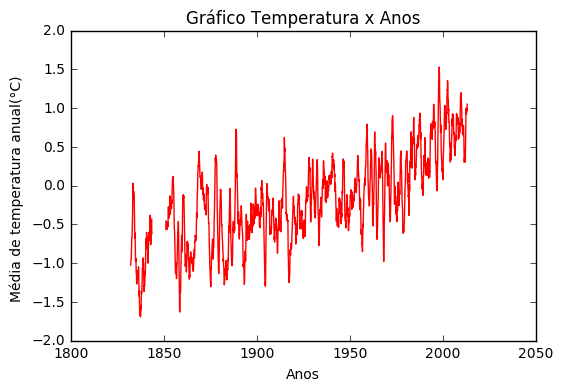

In [25]:
dados_ex_3 = np.loadtxt('dados/20.09S-44.36W-TAVG-Trend.txt', comments = '%') 
pratica_2_graficos_plotados(dados_ex_3)

# Parte 5 da aula

In [30]:
def pratica_2_graficos_plotados (imagem, nome):
    assert type (imagem) == np.ndarray, "Entre com uma matriz de dados para plotagem"
    dados_1 = temperatura_para_anos_decimais_anomalias_e_incertezas(imagem)

    plt.figure()
    plt.plot (dados_1[0],dados_1[1],'r-')
    plt.xlabel ('Anos')
    plt.ylabel ('Média de temperatura anual(°C) ')
    plt.title (nome[6:-4])
    plt.savefig (nome [6:-4] +'.png')
    return 
# utilizamos as funções anteriores para poder plotar os gráficos referentes à prática 2
# salvamos em .png com os nomes dos arquivos


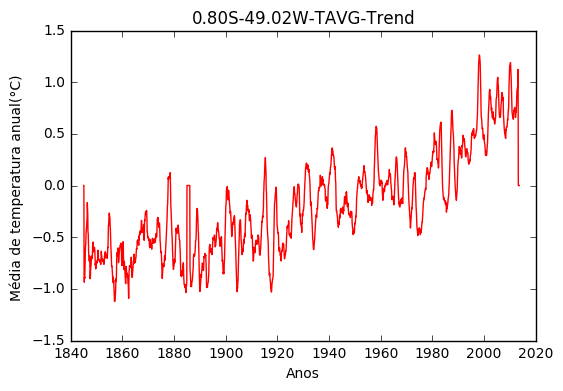

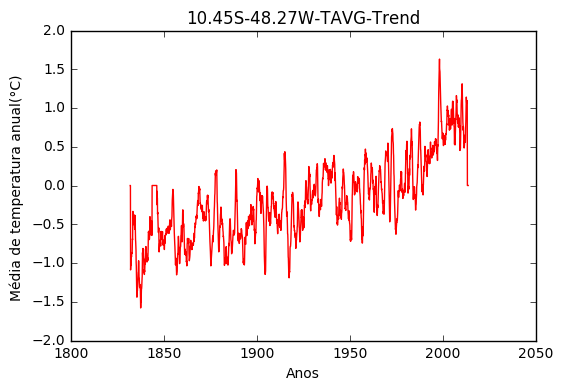

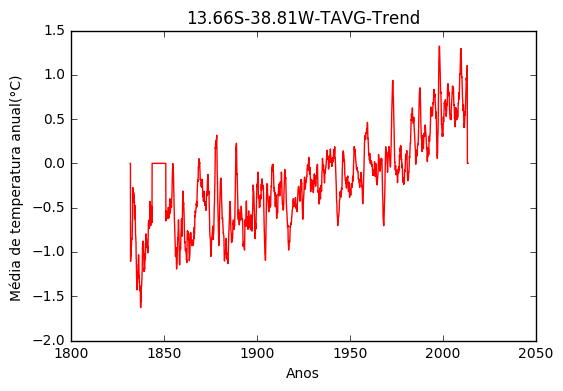

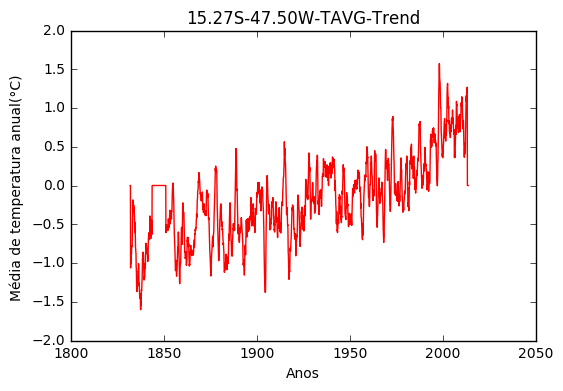

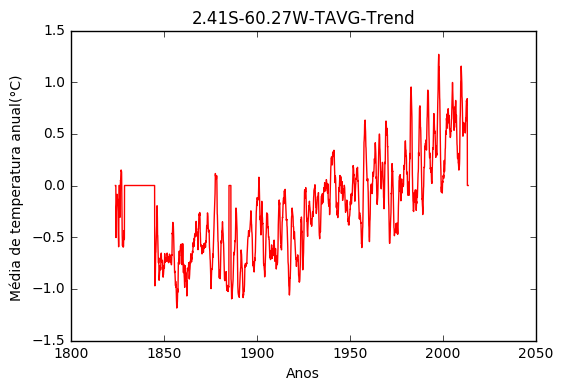

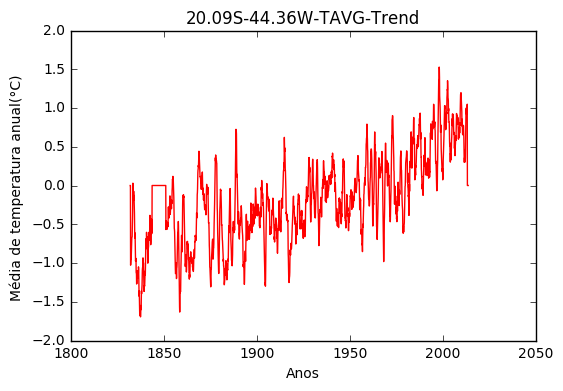

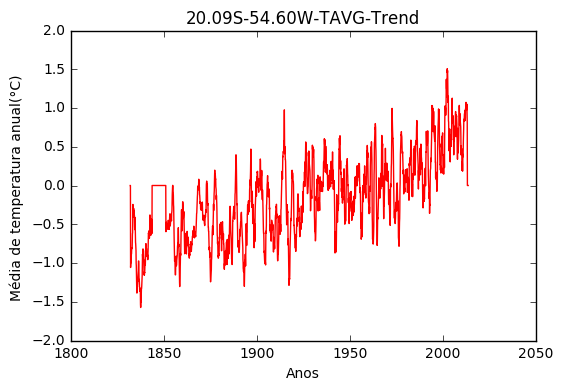

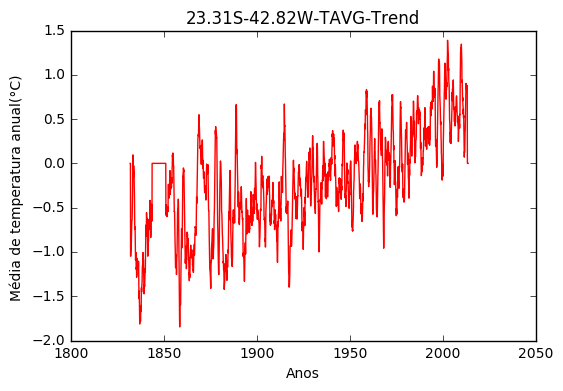

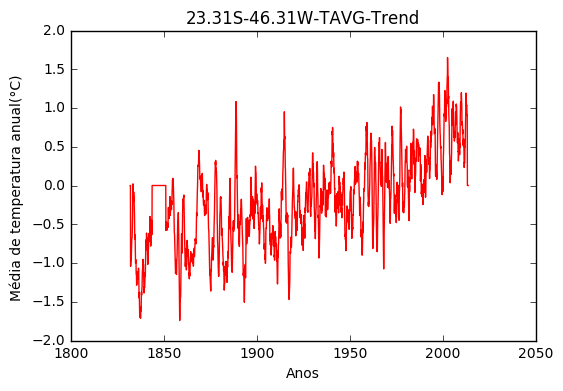

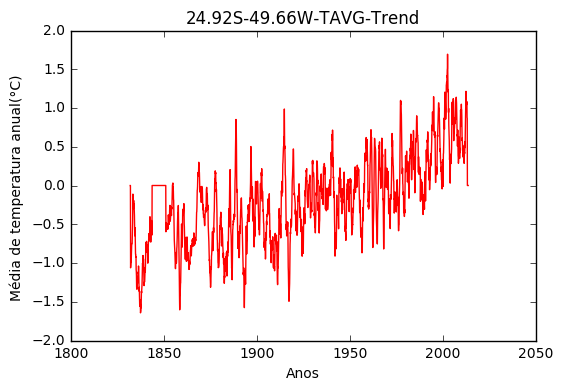

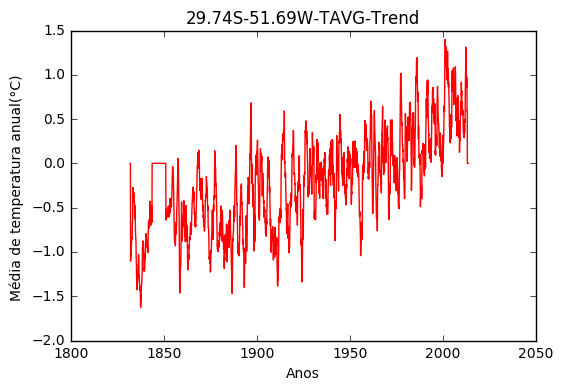

In [31]:
for dado in dados[0:11]:
    data = np.loadtxt(dado, comments = '%')
    pratica_2_graficos_plotados(data, dado)